# Crime Analysis in India

Crime in india has been documented since the British Raj, with complte statistics now collected yeraly by the National Crime Records Burea (NCRB), under the Ministry of Home Afairs(MHA).

As of **2018**, a total of **50,74,634** cognizable crimes comprising **31,32,954** Indian Penal Code (IPC) crimes and **19,41,680** Special & Local Laws (SLL) crimes were registered nationwide. Despite showing a **1.3%** annual increase in the registration of cases (**50,07,044 cases**), the crime rate per **100,000** population has slightly come down from **388.6** in **2017** to **383.5** in **2018**.


<div style="text-align:center; margin-left: auto; margin-right: auto;">
    <img src="https://i.imgur.com/uRdbnwL.png">
</div>


## **Importing Module**


In [2]:
from IPython.display import HTML
import cufflinks as cf
from plotly.subplots import make_subplots
from plotly.colors import n_colors
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import IPython
%matplotlib inline
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
cf.go_offline()


Notice this I also include the special command `%matplotlib inline` to ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.


## **Reading File**


In [3]:
rp_victim = pd.read_csv('data/Victims_of_rape.csv')
hr_police = pd.read_csv('data/Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('data/Auto_theft.csv')
property_theft = pd.read_csv('data/Property_stolen_and_recovered.csv')
child_victim = pd.read_csv('data/Crime_Againest_Child 2001 2013.csv')


### **Rape Cases**

**Rape** is the **fourth** considerable common offence against females in India. Laws against rape come under the **Indian Penal Code 376**. Incest ravishment (rape) cases are registered under the circumstances that the culprit is known to the victim.


#### **Incest** ravishment (rape) cases reported from **2001** to **2010**


In [4]:
inc_victims = rp_victim[rp_victim['Subgroup'] == 'Victims of Incest Rape']
g = pd.DataFrame(inc_victims.groupby(['Year'])[
    'Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year', 'Cases Reported']
fig = px.bar(g, x='Year', y='Cases Reported', color_discrete_sequence=['red'])
fig.show()


In [5]:
inc_victims = rp_victim[rp_victim['Subgroup'] == 'Victims of Incest Rape']
g = pd.DataFrame(inc_victims.groupby(['Year'])[
    'Rape_Cases_Reported'].sum().reset_index())
sortedIncVictimsTop = g.sort_values(['Rape_Cases_Reported'], ascending=False)
HTML(sortedIncVictimsTop.head(1).to_html(index=False))


Year,Rape_Cases_Reported
2005,750


In [6]:
HTML(sortedIncVictimsTop.tail(1).to_html(index=False))


Year,Rape_Cases_Reported
2010,288


**_According to Above Graph and Data Analysis:_**

- In **2005**, **750** cases were reported that is the **height** number of that decade.
- In **2010** noted that the lowest number (**288**) of cases were reported.


#### **State** wise **incest** rape cases reported from **2001** to **2010**


In [7]:
UTinCest = pd.DataFrame(inc_victims.groupby(['Area_Name'])[
                        'Rape_Cases_Reported'].sum().reset_index())
sortedUTData = UTinCest.sort_values(['Rape_Cases_Reported'], ascending=False)
HTML(sortedUTData.head(5).to_html(index=False))
# sortedUTData.head(5)


Area_Name,Rape_Cases_Reported
Madhya Pradesh,865
Chhattisgarh,532
Maharashtra,359
Rajasthan,337
Jharkhand,321


In [9]:
HTML(sortedUTData.tail(8).to_html(index=False))

Area_Name,Rape_Cases_Reported
Tripura,5
Nagaland,4
Andaman & Nicobar Islands,1
Puducherry,0
Dadra & Nagar Haveli,0
Lakshadweep,0
Daman & Diu,0
Arunachal Pradesh,0


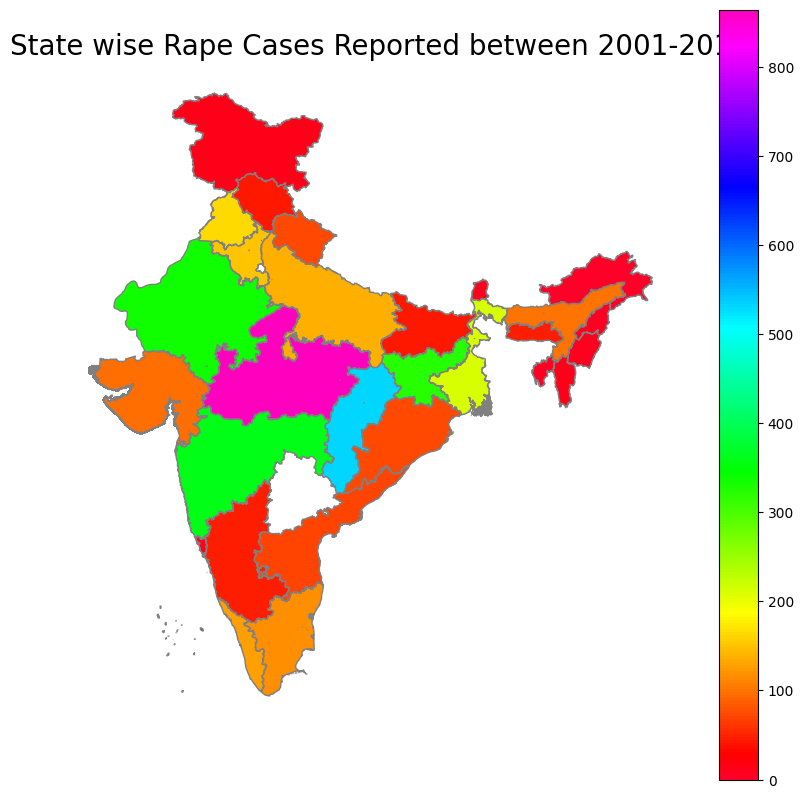

In [10]:
geo1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])[
                    'Rape_Cases_Reported'].sum().reset_index())
geo1.columns = ['State', 'Cases Reported']
geo1.replace(to_replace='Arunachal Pradesh', value='Arunanchal Pradesh', inplace=True)
shp_geoDataFrame = gpd.read_file(
    'India_GIS_Data/India States/Indian_states.shp')
mergedGeoUT = shp_geoDataFrame.set_index('st_nm').join(geo1.set_index('State'))
# print(mergedGeoUT)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State wise Rape Cases Reported between 2001-201', fontdict={'fontsize': '20', 'fontweight': '5'})
fig = mergedGeoUT.plot(column='Cases Reported', cmap='gist_rainbow', linewidth=1, ax=ax, edgecolor='0.5', legend=True)
# pio.write_image(fig, 'DemoRepOfRapeVic.png')

**_According to Above Graph and Data Analysis:_**

- Top **5** states having **highest** number of cases :- **Madhya Pradesh**, **Chhatishgarh**, **Maharshtra**, **Rajasthan**, **Jharkhand**
- Top **5** states having **_zero_** number of cases - **Arunachal Pradesh**, **Daman & Diu**, **Lakshadweep**, **Dadra & Nagar Haveli**, **Puducherry**
- Top **3** State states having **loswet** number of cases :- **Andaman & Nicobar Islands**, **Nagaland**, **Tripura**


#### Distribution of **age groups** of **incest** Victims


In [11]:
victimsAbove50 = inc_victims['Victims_Above_50_Yrs'].sum()
victimsTenTo14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
victimsFourteenTo18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
victimsEighteenTo30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
victimsThirtyTo50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
victimsUpto10 = inc_victims['Victims_Upto_10_Yrs'].sum()

ageGrp = ['Upto 10', '10 to 14', '14 to 18',
          '18 to 30', '30 to 50', 'Above 50']
ageGrpVal = [victimsUpto10, victimsTenTo14, victimsFourteenTo18,
             victimsEighteenTo30, victimsThirtyTo50, victimsAbove50]


In [12]:
mergeGrpVal = list(zip(ageGrp, ageGrpVal))
vicAccAge = pd.DataFrame(mergeGrpVal, columns=[
                         'Distrubution of age', "No of Victims"])
sortvicAccAge = vicAccAge.sort_values(['No of Victims'], ascending=False)
HTML(sortvicAccAge.to_html(index=False))

Distrubution of age,No of Victims
18 to 30,1882
14 to 18,1042
30 to 50,517
10 to 14,513
Upto 10,239
Above 50,26


In [15]:
fig = go.Figure(data=[go.Pie(labels=ageGrp, values=ageGrpVal, sort=False, marker=dict(
    colors=px.colors.qualitative.Light24), textfont_size=15)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000', width=1)))
fig.show()

**_According to Above Graph and Data Analysis:_**

- Women between the age group of **18-30** have been most **affected**
- Women between the age group above **50** have been least **affected**


### **Human Rights Violation by the Police**

**Human Rights** in India is an issue complicated by the country's large size and population, widespread poverty, lack of proper education, as well as its diverse culture, despite its status as the world's largest sovereign, secular, democratic republic.


#### State wise cases registered under **Humen Rights violation** from **2001** to **2010**


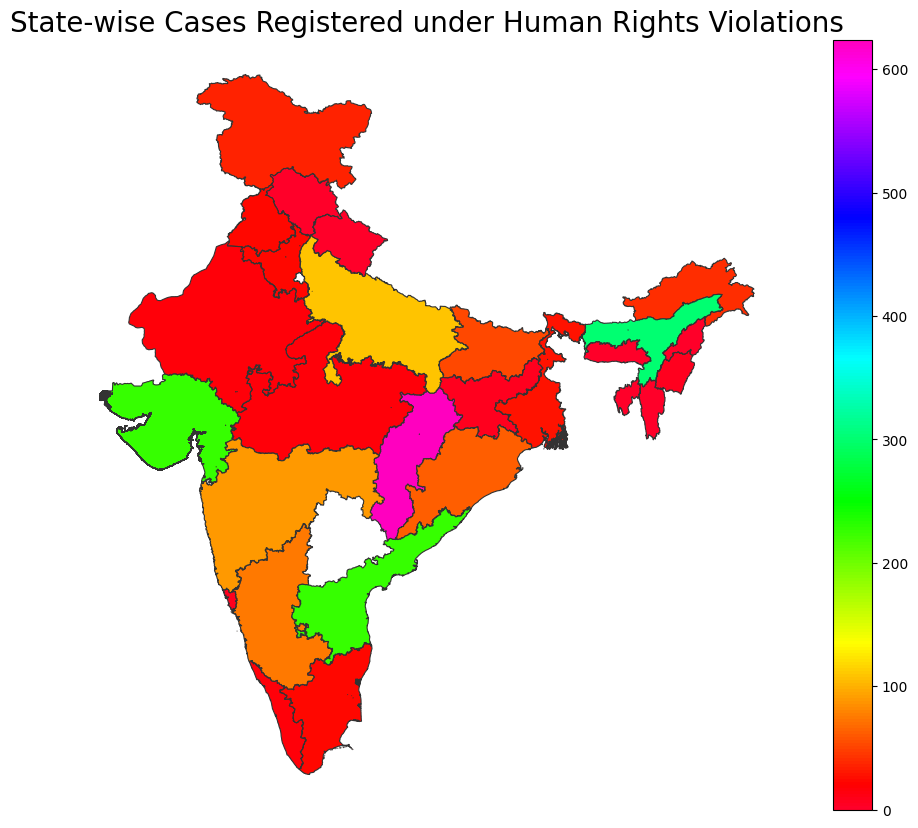

In [12]:
UT_hrVioPol = pd.DataFrame(hr_police.groupby(['Area_Name'])[
                           'Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
UT_hrVioPol.columns = ['State', 'Case Reported']
UT_hrVioPol.replace(to_replace='Arunachal Pradesh',
                    value='Arunanchal Pradesh', inplace=True)
shp_gdf = gpd.read_file('India_GIS_Data/India States/Indian_states.shp')
merged_map_data = shp_gdf.set_index(
    'st_nm').join(UT_hrVioPol.set_index('State'))
fig, ax = plt.subplots(1, figsize=(12, 10), sharex=True)
ax.axis('off')
ax.set_title('State-wise Cases Registered under Human Rights Violations',
             fontdict={'fontsize': 20, 'fontweight': 20})
fig = merged_map_data.plot(column='Case Reported', cmap='gist_rainbow',
                           linewidth=0.8, ax=ax, edgecolor='0.2', legend=True)


**_According to Above Map:_**

- Top 3 states with **highest** number of cases against police **Chhatisgrah**, **Assam**, **Gujarat**
- Top 3 states with **lowest** number of cases against police **Manipur**, **Uttarakhand**, **Goa**


#### **Cases registered against Police under Human Rights violations from 2001 to 2010**


In [16]:
bar_hrv_by_pol = pd.DataFrame(hr_police.groupby(
    ['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
bar_hrv_by_pol.columns = ['Year', 'Case Registered']
fig = px.bar(bar_hrv_by_pol, x='Year',
             y='Case Registered', color='Case Registered',
             height=800
             )
fig.show()

In [17]:
top_bar_hrv_by_pol = bar_hrv_by_pol.sort_values(['Case Registered'])
HTML(top_bar_hrv_by_pol.tail(1).to_html(index=False))

Year,Case Registered
2008,506.0


In [18]:
least_bar_hrv_by_pol = bar_hrv_by_pol.sort_values(
    ['Case Registered'], ascending=False)
HTML(least_bar_hrv_by_pol.tail(1).to_html(index=False))

Year,Case Registered
2006,58.0


- In **2008**, **_highest_** number of cases were recorded - **506**
- The year 2006 recorded **_least_** number of cases i.e **58**


#### **Types of Human Rights Violation**


In [19]:
typesOfHRV = hr_police.Group_Name.value_counts().sort_values()
print(typesOfHRV)

HR_Failure in taking action                   181
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_Illegal detention/arrests                  186
HR_Atrocities on SC/ST                        188
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Torture                                    190
HR_Others Violations by Police                194
HR_Total Violations by Police                 214
Name: Group_Name, dtype: int64


#### **Cases have been registered under the following heads:**


##### **_1. Cases Registed under Human Rights Violation - Taking Action_**


In [20]:
take_action = hr_police[hr_police['Group_Name']
                        == 'HR_Failure in taking action']
take_action.Cases_Registered_under_Human_Rights_Violations.sum()

40.0

##### **_2. Cases Registed under Human Rights Violation - HR_Violation against Terrorists/Extremists_**


In [22]:
terr_df = hr_police[hr_police['Group_Name'] ==
                    'HR_Violation against Terrorists/Extremists']
terr_df.Cases_Registered_under_Human_Rights_Violations.sum()


15.0

##### **_3. Cases Registed under Human Rights Violation - False implication_**


In [24]:
false_impli_df = hr_police[hr_police['Group_Name'] == 'HR_False implication']
false_impli_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

##### **_4. Cases Registed under Human Rights Violation - Fake encounter killings_**


In [25]:
fake_enco_df = hr_police[hr_police['Group_Name'] == 'HR_Fake encounter killings']
fake_enco_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

##### **_5. Cases Registed under Human Rights Violation - Ndignity to Women_**


In [26]:
ndignity_df = hr_police[hr_police['Group_Name'] == 'HR_Indignity to Women']
ndignity_df.Cases_Registered_under_Human_Rights_Violations.sum()

38.0

##### **_6. Cases Registed under Human Rights Violation - Disappearance of Persons_**


In [27]:
diss_Of_Per = hr_police[hr_police['Group_Name'] == 'HR_Disappearance of Persons']
diss_Of_Per.Cases_Registered_under_Human_Rights_Violations.sum()

14.0

##### **_7. Cases Registed under Human Rights Violation - Extortion_**


In [28]:
extor_df = hr_police[hr_police['Group_Name'] == 'HR_Extortion']
extor_df.Cases_Registered_under_Human_Rights_Violations.sum()

78.0

##### **_8. Cases Registed under Human Rights Violation - Torture_**


In [29]:
tort_df = hr_police[hr_police['Group_Name'] == 'HR_Torture']
tort_df.Cases_Registered_under_Human_Rights_Violations.sum()

96.0

#### **Policemen Chargesheeted vs Policemen Convicted**


In [30]:
chargesheeted_vs_convicted = pd.DataFrame(hr_police.groupby(
    ['Year'])['Policemen_Chargesheeted', 'Policemen_Convicted'].sum().reset_index())
year = ['2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010']

In [31]:
HTML(chargesheeted_vs_convicted.to_html(index=False))

Year,Policemen_Chargesheeted,Policemen_Convicted
2001,270.0,4.0
2002,118.0,0.0
2003,46.0,20.0
2004,44.0,0.0
2005,42.0,0.0
2006,56.0,0.0
2007,74.0,0.0
2008,28.0,16.0
2009,166.0,116.0
2010,28.0,8.0


In [33]:
fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted',
              x=year,
              y=chargesheeted_vs_convicted['Policemen_Chargesheeted'],
              marker_color='blue'
       ),
    go.Bar(name='Policemen Convicted',
              x=year,
              y=chargesheeted_vs_convicted['Policemen_Convicted'],
              marker_color='red',
       )]
)
fig.update_layout(barmode='group', xaxis_title='Year',
                     yaxis_title='Number of Policemen')
fig.show()

- In 2009, **_69.87%_** of policemen have been convicted - highest of the decade.
- For about **_three consecutive_** years, **2005, 2006, 2007** there has been **_no_** conviction of policemen.


### **Auto Theft cases**


#### **State wise number of vehicles stolen from 2001 to 2010**


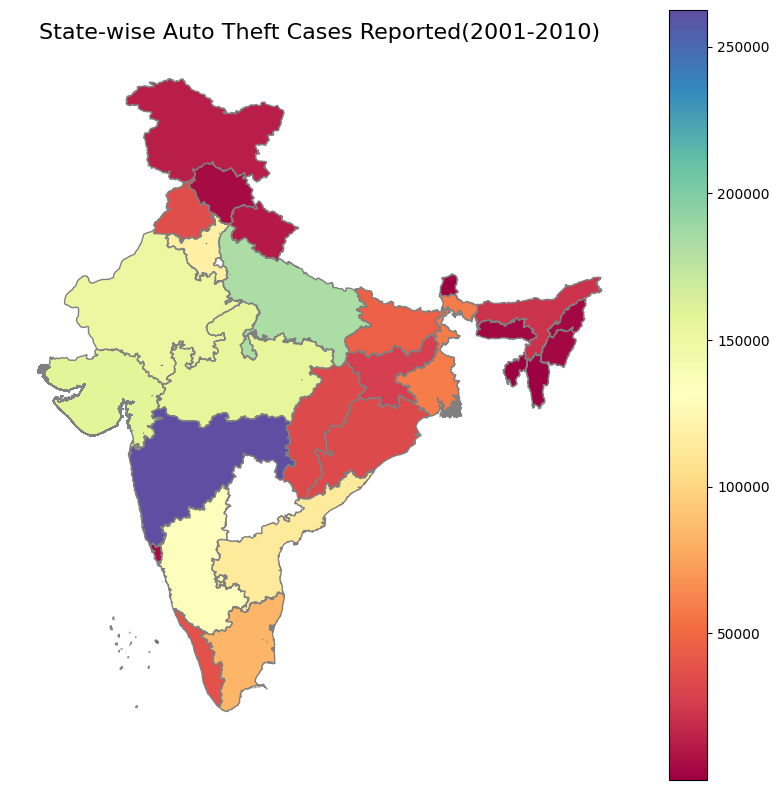

In [34]:
state_wise_Vecch_stolen = pd.DataFrame(auto_theft.groupby(
    ['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
state_wise_Vecch_stolen.columns = ['State/UT', 'Vechicle_Stolen']
state_wise_Vecch_stolen.replace(
    to_replace='Arunachal Pradesh', value='Arunachal Pradesh', inplace=True)
shp_gdf = gpd.read_file('India_GIS_Data/India States/Indian_states.shp')
merged_map_data_state_wise_Vecch_stole = shp_gdf.set_index(
    'st_nm').join(state_wise_Vecch_stolen.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '16', 'fontweight': '4'})

fig = merged_map_data_state_wise_Vecch_stole.plot(
    column='Vechicle_Stolen', cmap='Spectral', linewidth=1, ax=ax, edgecolor='0.5', legend=True)

In [35]:
three_state_stolen_vechicle = state_wise_Vecch_stolen.sort_values(
    ['Vechicle_Stolen'], ascending=False)
HTML(three_state_stolen_vechicle.head(3).to_html(index=False))

State/UT,Vechicle_Stolen
Maharashtra,262564
Delhi,197330
Uttar Pradesh,183116


In [36]:
HTML(three_state_stolen_vechicle.tail(7).to_html(index=False))

State/UT,Vechicle_Stolen
Tripura,996
Mizoram,868
Daman & Diu,510
Dadra & Nagar Haveli,446
Andaman & Nicobar Islands,166
Sikkim,142
Lakshadweep,22


- Top **3 states** with **highest** number of auto theft cases **Maharashtra, Uttar Pradesh,Gujarat**
- Top **3 states** with **lowest** number of auto theft cases **Sikkim, Mizoram, Tripura** except Union Territories


#### **Proportion of vehicles stolen, traced and recovered**


In [37]:
autoTheftTraced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
autoTheftRecovred = auto_theft['Auto_Theft_Recovered'].sum()
autoTheftStolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicleGroup = ['Vechicles Stolen', 'Vechicles Traced', 'Vehicles Recovered']
vehicleVal = [autoTheftStolen, autoTheftTraced, autoTheftRecovred]
colors = ['tomato', 'lime', 'gold']

fig = go.Figure(data=[go.Pie(labels=vehicleGroup,
                             values=vehicleVal,
                             sort=False,
                             marker=dict(colors=colors),
                             textfont_size=12
                             )
                      ]
                )
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000', width=1)))
fig.show()

- Out of **2,467,182** vehicles stolen, **21.2%** have been **recovered**.


#### **Year wise vehicles stolen**

- To see horizontal bar chart uncomment the following line


In [38]:
year_wise_vechicle_stolen = pd.DataFrame(auto_theft.groupby(
    ['Year'])['Auto_Theft_Stolen'].sum().reset_index())
year_wise_vechicle_stolen.columns = ['Year', 'Vehicles Stolen']
'''fig, ax = plt.subplots(figsize = (8, 6))
year = year_wise_vechicle_stolen['Year']
v_stolen = year_wise_vechicle_stolen['Vehicles Stolen']

ax.barh(year, v_stolen)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.3, 
    i.get_y()+0.7, 
    str(round((i.get_width()), 2)), 
    fontsize =12, 
    fontweight = 'bold', 
    color = 'darkred')

ax.set_title('Year Wise Car Stolen', fontsize = 20, fontweight = 'bold',
             loc ='left', )

fig.text(0.9, 0.15, '12103282', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
fig.show()
'''

fig = px.bar(year_wise_vechicle_stolen,
             x='Year',
             y='Vehicles Stolen',
             color='Vehicles Stolen',
             height=700,
             text_auto='.2s',
             # color_discrete_sequence=['#71e629'],
             )
fig.show()


#### **Types of vehicles stolen**


In [39]:
num_of_vechicles = ['Motor Cycles/ Scooters', 'Motor Car/Taxi/Jeep', 'Buses',
                    'Goods carrying vehicles (Trucks/Tempo etc)', 'Other Motor vehicles']

sr_number = [1, 2, 3, 4, 5]

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Sr No', 'Vehicle type'],
        font=dict(size=30),
        fill_color='turquoise', height=40),
    cells=dict(values=[sr_number, num_of_vechicles],
               height=40))
])

fig.show()

#### **Top 10 States/UT with highest number of motor cycles stolen**


In [40]:
top_10_motor = auto_theft[auto_theft['Sub_Group_Name']
                          == '1. Motor Cycles/ Scooters']
# print(top_10_motor)

graph_top_10_motor = pd.DataFrame(top_10_motor.groupby(
    ['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
# print(graph_top_10_motor)

graph_top_10_motor_sorted = graph_top_10_motor.sort_values(
    ['Auto_Theft_Stolen'], ascending=True)
# print(graph_top_10_motor_sorted)

fig = px.bar(
    graph_top_10_motor_sorted.iloc[-10:, :], 
    y='Area_Name',
    x='Auto_Theft_Stolen', 
    orientation='h', 
    color='Auto_Theft_Stolen',
    height=600
    )
fig.show()

- **Maharashtra** has the most cases of vehicles stolen - over **103k**


### **Property theft cases**


#### **State wise** number of property stolen cases from **2001** to **_2010_**


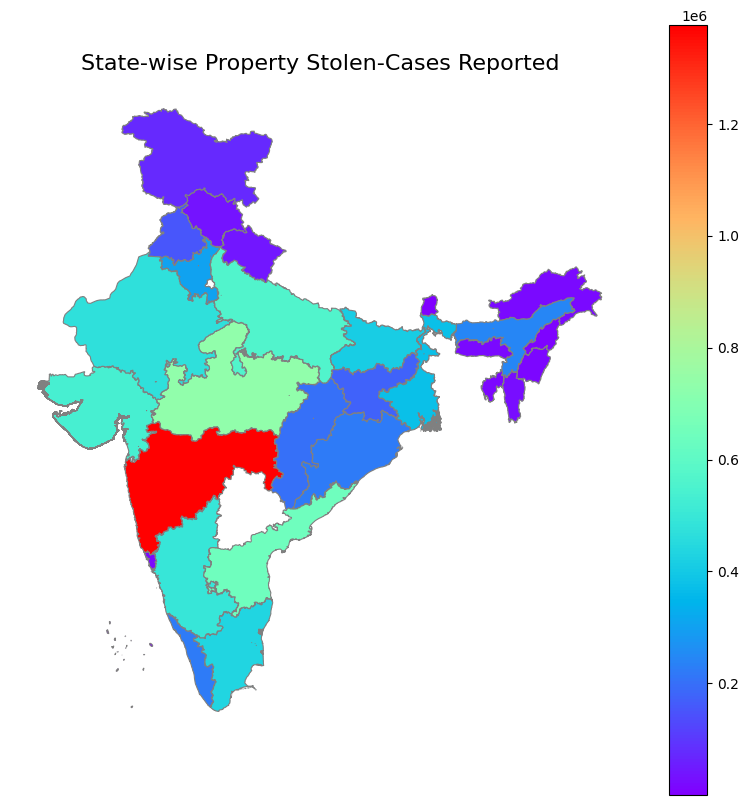

In [41]:
state_wise_property_case = pd.DataFrame(property_theft.groupby(
    ['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
# print(state_wise_property_case)
state_wise_property_case.columns = ["State/UT", "Cases Reported"]
# print(state_wise_property_case)
state_wise_property_case.replace(
    to_replace='Arunachal Pradesh', value='Arunanchal Pradesh', inplace=True)
# print(state_wise_property_case.sort_values(['Cases Reported']))
shp_gdf = gpd.read_file('India_GIS_Data/India States/Indian_states.shp')
# print(shp_gdf)
merged = shp_gdf.set_index('st_nm').join(
    state_wise_property_case.set_index('State/UT'))
# print(merged)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '16', 'fontweight': '4'}
             )
fig = merged.plot(column='Cases Reported', cmap='rainbow',
                  linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

#### **Types of property stolen cases**


**Cases have been registered under the following heads:**

1. Dacoity

2. Criminal Breach of Trust

3. Robbery

4. Burglary

5. Theft

6. Others


#### **Property stolen vs recovered**


In [42]:
prop_theft_recovered = property_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = property_theft['Cases_Property_Stolen'].sum()

print(prop_theft_stolen, "Property Stolen",  "and",
      prop_theft_recovered, "Property Recovred")
prop_group = ['Property Stolen Cases', 'Property Recovered Cases']
prop_vals = [prop_theft_stolen, prop_theft_recovered]

colors = ['red', 'green']

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals, sort=False,
                              marker=dict(colors=colors), textfont_size=12)])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000', width=2)))
fig.show()

8374162 Property Stolen and 3019353 Property Recovred


#### **Year-wise Value of Property Stolen and Recovered**


In [43]:
g9 = pd.DataFrame(property_theft.groupby(['Year'])[
    'Value_of_Property_Recovered', 'Value_of_Property_Stolen'].sum().reset_index())

year = ['2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
            marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
            marker_color='darkblue')
])

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Value in Rupees',
                    title='Year-wise Value of Property Stolen and Recovered')
fig.show()


### **Crime Against Child**


#### **Top 10 States/UT with highest number of infanticide crime**


In [44]:
inf_child_victim = child_victim[child_victim['CRIME_HEAD'] == 'INFANTICIDE']
graph_infant = pd.DataFrame(inf_child_victim.groupby(
    ['STATE/UT'])['Case_Reported'].sum().reset_index())
graph_infant.columns = ['State/UT', 'Case Reported']

top_10_infant = graph_infant.sort_values(['Case Reported'], ascending=True)

fig = px.bar(
    top_10_infant.iloc[-10:, :],
    x='Case Reported',
    y='State/UT',
    color='State/UT',
    orientation='h',
    facet_row_spacing=1,
    height=9*100,
    barmode='stack',
    text_auto=True,
    range_x=[0, 573],
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, paper_bgcolor="LightSteelBlue",
                  title_text='Top 10 State/UTs for Infanticide Crime', font=dict(size=20))
fig.update_traces(textfont_size=21)
fig.write_image('top_10_infant.png', scale=5)
fig.show()

- **Uttar Pradesh** has the most cases of Infanticide - over **572**


#### **State wise** number of crime against child from **2001** to **_2013_**


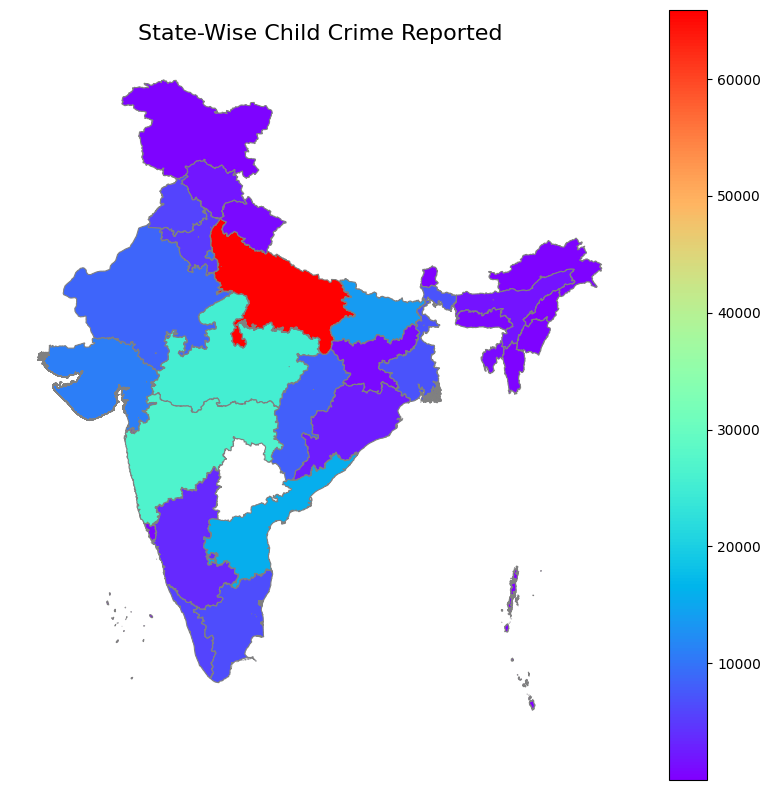

In [46]:
state_wise_child_crime = pd.DataFrame(
    child_victim.groupby(['STATE/UT'])
    ['Case_Reported'].sum().reset_index()
)
state_wise_child_crime.columns = ['State/UTs', 'Case Reported']
state_wise_child_crime.replace(
    to_replace='Arunanchal Pradesh',
    value='Arunanchal Pradesh',
    inplace=True
)
# print(state_wise_child_crime)

shp_gdf = gpd.read_file('India_GIS_Data/India States/Indian_states.shp')
merged_state_wise_child_gdf = shp_gdf.set_index('st_nm').join(
    state_wise_child_crime.set_index('State/UTs'))
# print(merged_state_wise_child_gdf)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title(
    'State-Wise Child Crime Reported',
    fontdict={'fontsize': '16', 'fontweight': '4'}
)
fig = merged_state_wise_child_gdf.plot(
    column='Case Reported',
    cmap='rainbow',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.5',
    legend=True
)

In [41]:
g10 = pd.DataFrame(
    child_victim.groupby(['CRIME_HEAD'])['2001', '2005', '2010', '2013'].sum().reset_index()
    )

# print(g10)

# year = ['2001', '2005', '2010', '2013']
crime_head = [
    'ABETMENT OF SUICIDE', 
    'BUYING OF GIRLS FOR PROSTITUTION',
    'EXPOSURE AND ABANDONMENT',
    'FOETICIDE',
    'INFANTICIDE',
    'KIDNAPPING and ABDUCTION OF CHILDREN',
    'MURDER OF CHILDREN',
    'PROCURATION OF MINOR GILRS',
    'PROHIBITION OF CHILD MARRIAGE ACT',
    'RAPE OF CHILDREN',
    'SELLING OF GIRLS FOR PROSTITUTION'
    ]
fig = go.Figure(data = [
    go.Bar(name = '2001', x = g10['2001'], y = crime_head, marker_color = 'gold', orientation = 'h'),
    go.Bar(name = '2005', x = g10['2005'], y = crime_head, marker_color = 'darkblue', orientation = 'h'),
    go.Bar(name = '2010', x = g10['2010'], y = crime_head, marker_color = 'green', orientation = 'h'),
    go.Bar(name = '2013', x = g10['2013'], y = crime_head, marker_color = 'red', orientation = 'h')
])
fig.update_layout(xaxis_title='No of Crime', yaxis_title='Type of Crime',
                    title='Year-wise No of Crime between 2001 to 2013',height=700,)
fig.show()